In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandasgui import show
from ydata_profiling import ProfileReport

In [ ]:
df_train = pd.read_csv('./data/train_data.csv')
df_label = pd.read_csv('./data/train_label.csv')
df_train.drop('样品编号', axis = 1, inplace = True)

In [ ]:
df_train = pd.concat([df_label, df_train], axis = 1)

In [ ]:
df_train.describe()

,样品编号,水分,灰分,908.1,914.294,920.489,926.683,932.877,939.072,945.266,...,1620.451,1626.645,1632.839,1639.034,1645.228,1651.423,1657.617,1663.811,1670.006,1676.2
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,13.646200,17.344860,0.832651,0.842354,0.850849,0.858745,0.866692,0.872813,0.876633,...,0.770680,0.769703,0.768431,0.767733,0.766918,0.766014,0.765315,0.764563,0.763617,0.762926
std,144.481833,4.878336,7.531994,0.026597,0.025591,0.024754,0.023757,0.023033,0.022373,0.021927,...,0.032754,0.032621,0.032878,0.032804,0.032801,0.032830,0.032921,0.032949,0.032829,0.032922
min,0.000000,4.700000,3.970000,0.727191,0.743425,0.758716,0.773788,0.789644,0.801787,0.809344,...,0.626854,0.625457,0.624087,0.622978,0.621804,0.620750,0.619933,0.619106,0.618328,0.617689
25%,124.750000,9.800000,11.387500,0.813018,0.823399,0.832430,0.841216,0.848774,0.855923,0.860855,...,0.748349,0.746962,0.745972,0.744864,0.744501,0.743225,0.742767,0.740898,0.740818,0.740345
50%,249.500000,13.350000,17.380000,0.833286,0.841840,0.850734,0.858791,0.866906,0.873741,0.876919,...,0.769474,0.768604,0.767205,0.766608,0.765650,0.764856,0.764064,0.763490,0.762263,0.761634
75%,374.250000,16.425000,23.362500,0.853079,0.861945,0.869141,0.876823,0.884228,0.889670,0.893468,...,0.793542,0.792323,0.791226,0.790845,0.789709,0.788893,0.788235,0.787034,0.786317,0.785294
max,499.000000,29.000000,36.780000,0.936388,0.939432,0.939657,0.939978,0.939165,0.939024,0.938619,...,0.920347,0.920036,0.919597,0.919562,0.919471,0.919367,0.919410,0.919235,0.918697,0.918253


In [ ]:
# 转置后绘图
df_tp = df_train.iloc[:,3:].transpose()
df_tp['spectrum']= df_tp.index.astype(float)

## 对比不同号段样本的光谱吸收值 发现
### 1. 0-100样本吸收值分布与 其余400个样本有较大差别, 体现在 950-1100波长段吸收值pattern存在显著差异, 0-100整个波段校平, 而100-500的峰值在1080附近
### 2. 标号越往后的样本, 950-1100波段的吸收峰值逐渐提升, 有0.85 上升至0.92, 猜测标号越大, 吸收值越大
### 3. 从吸收值的变化趋势看, 样本基本可以分成 平滑与非平滑两类

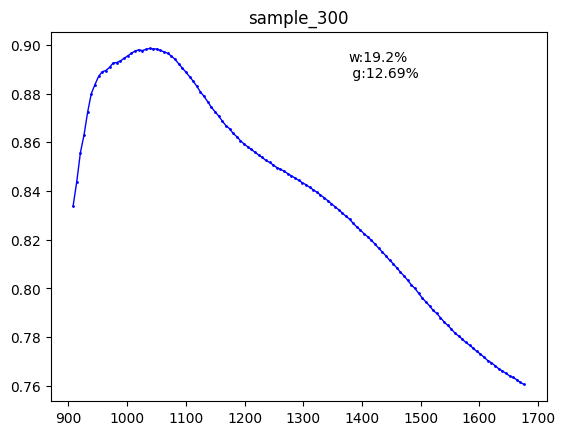

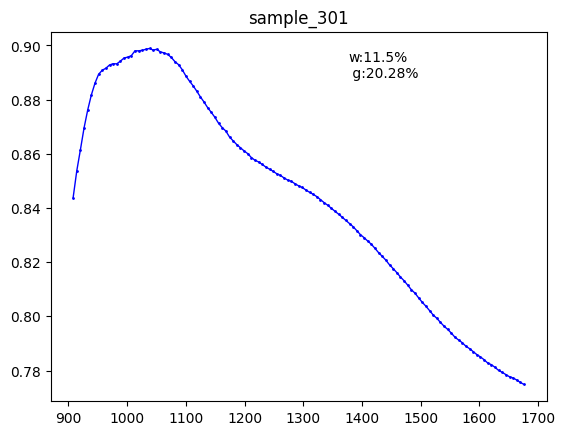

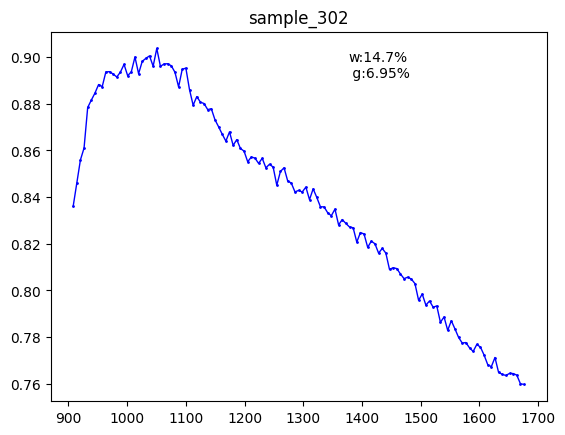

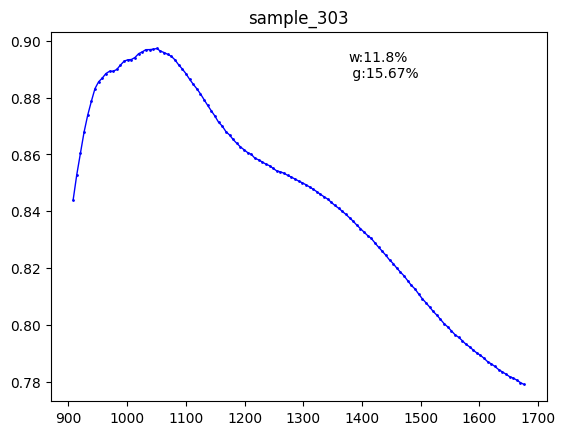

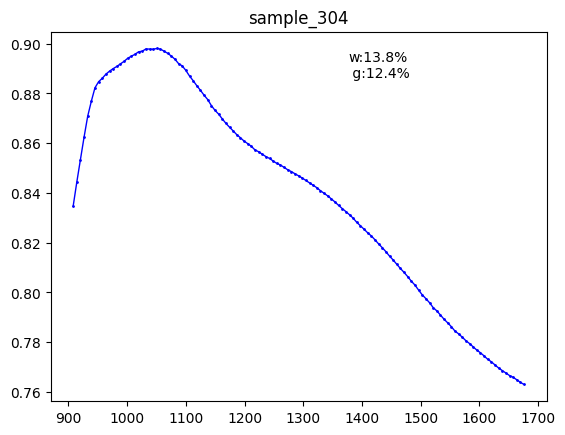

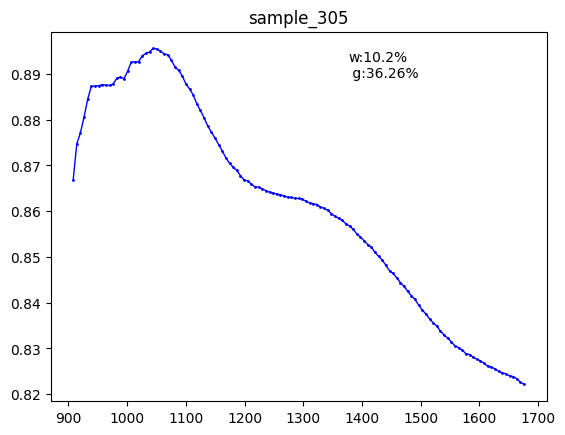

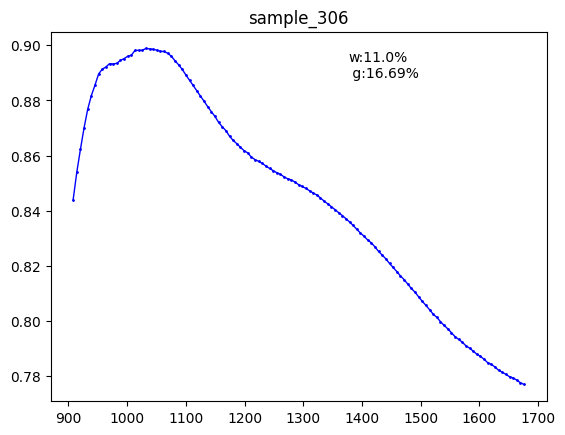

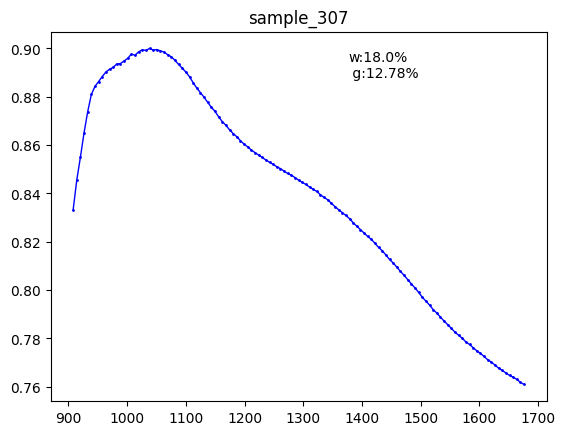

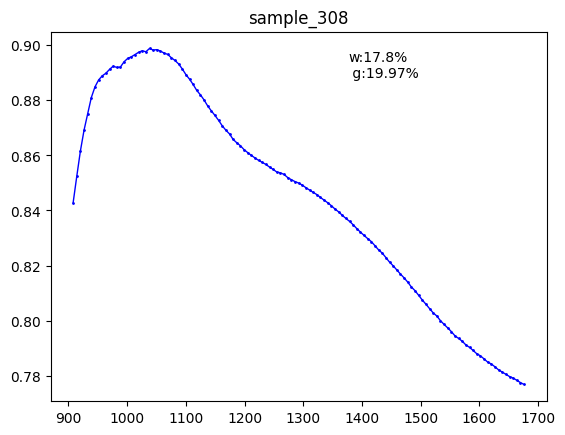

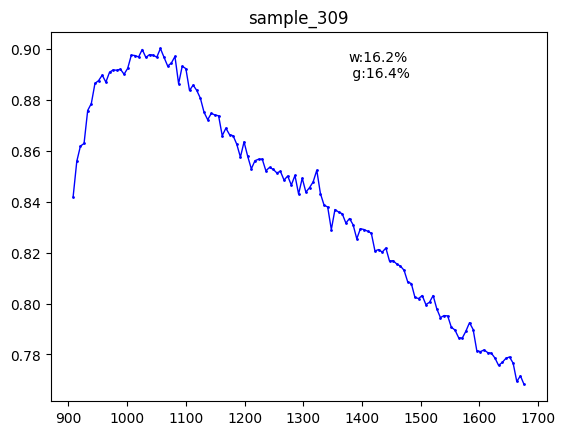

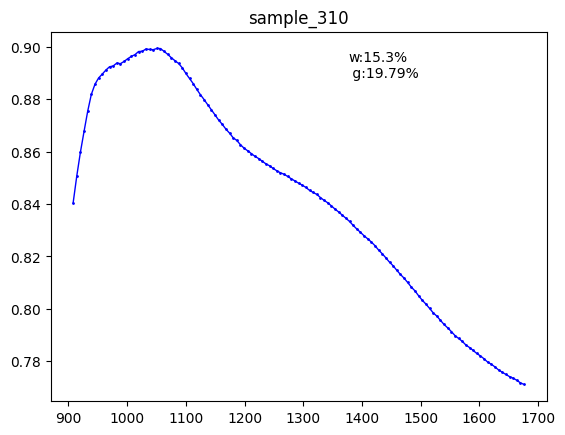

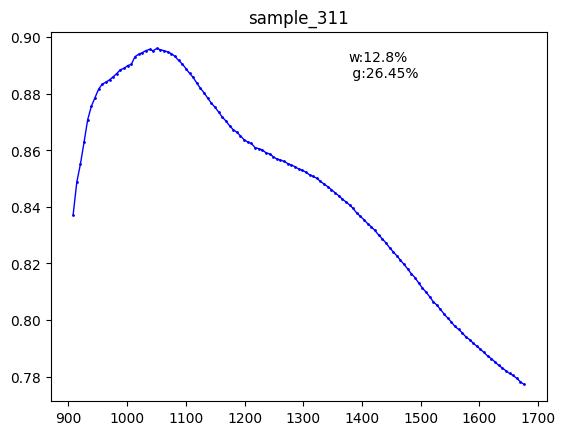

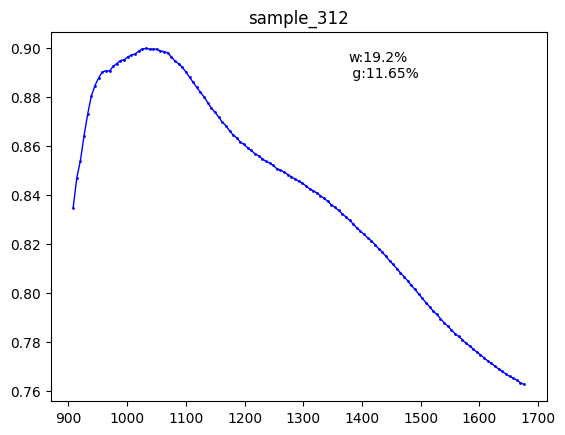

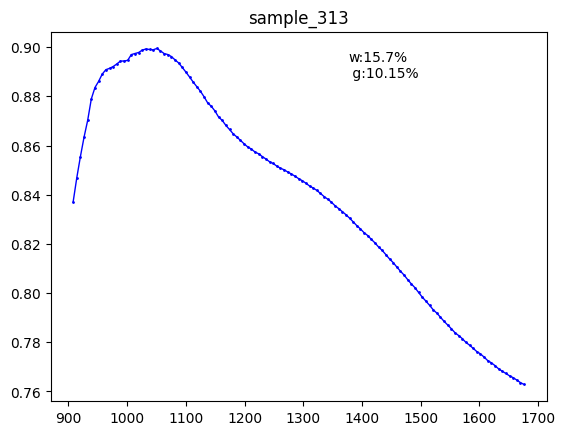

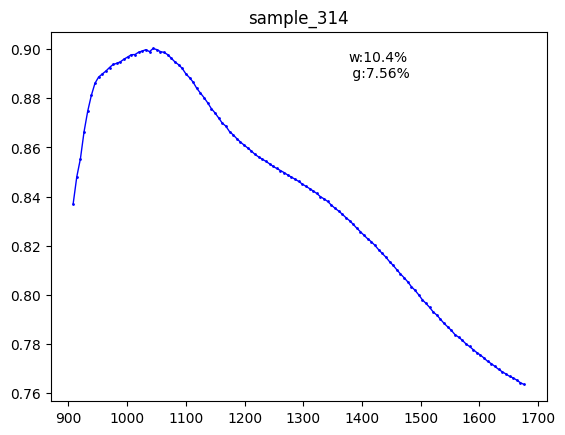

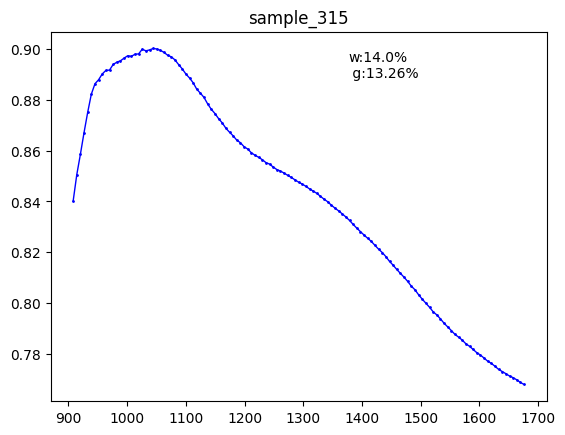

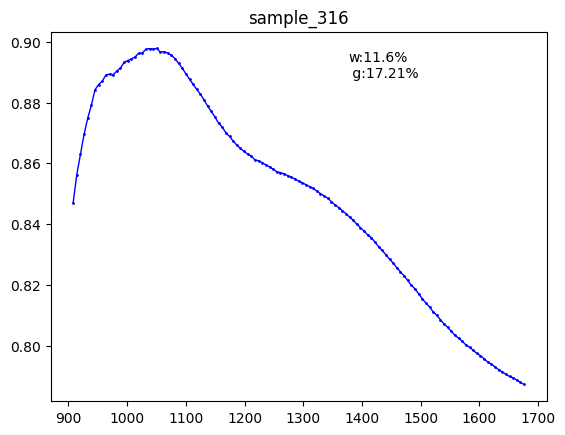

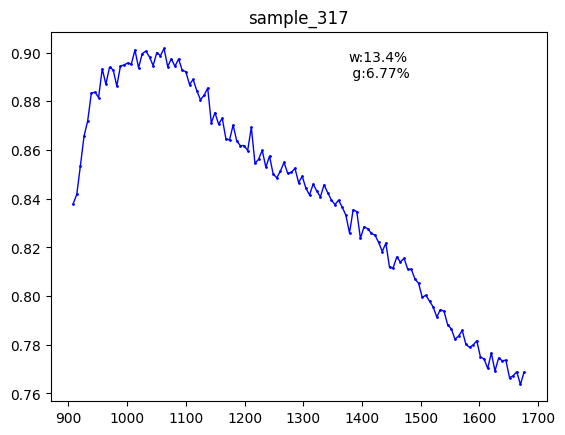

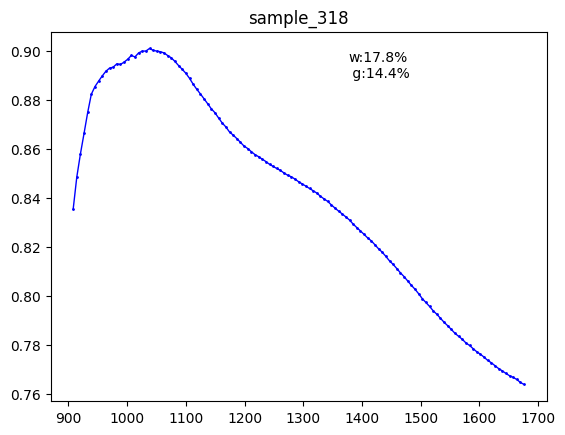

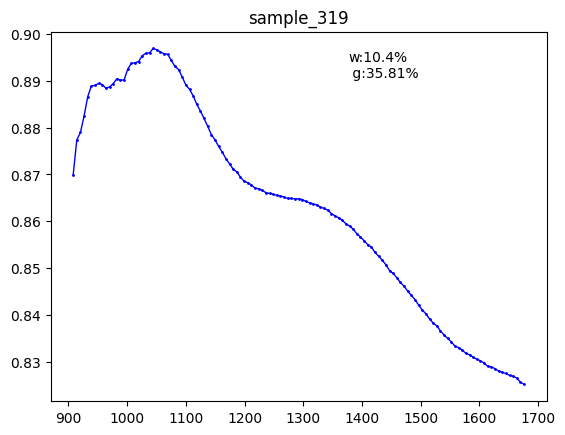

In [ ]:
for i in range(300,320):
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)
    plt.title(f'sample_{i}')
    plt.text(0.6, 0.95, f'w:{df_train.iloc[i,1]}%\n g:{df_train.iloc[i,2]}%', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes)
    plt.show()

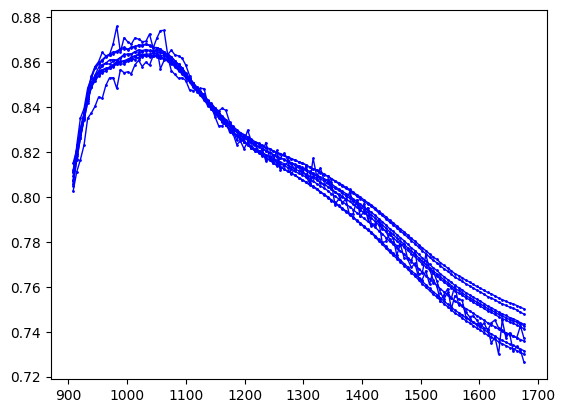

In [ ]:
for i in range(90,100):
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)

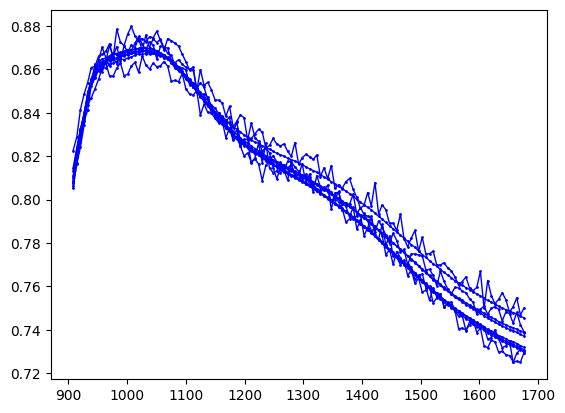

In [ ]:
for i in range(100,110):
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)

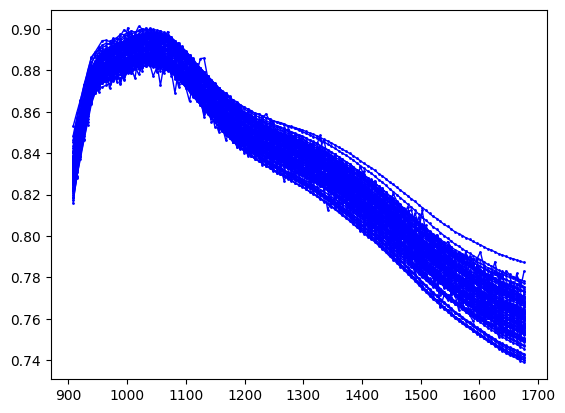

In [ ]:
for i in range(200,300):
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)

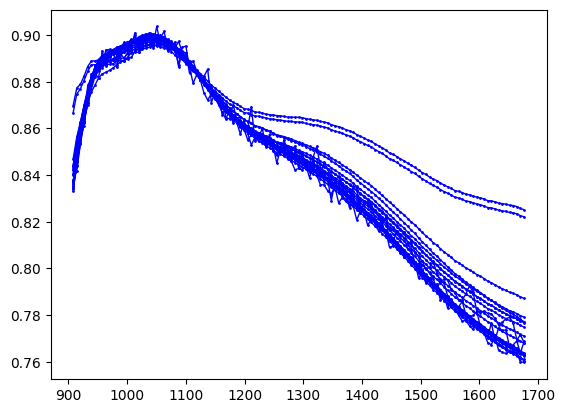

In [ ]:
for i in range(300,320):
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)

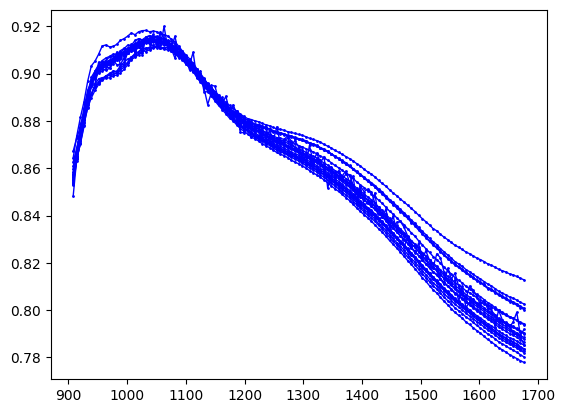

In [ ]:
for i in range(400,420):
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)

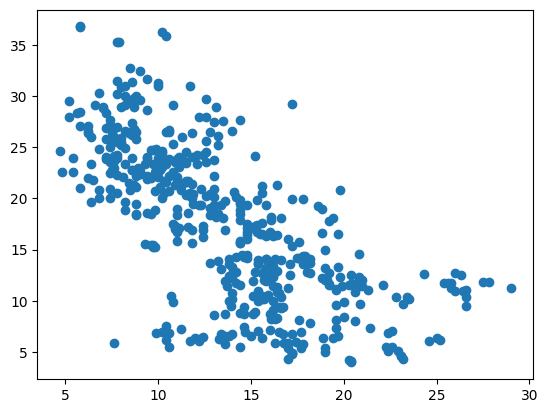

In [ ]:
# 水分 vs 灰分
plt.scatter(df_train['水分'],df_train['灰分'])

# 构建特征

## 1.获取吸收最大值, 以及最大值所在波长

In [ ]:
df_train['max_spectrum'] = df_train.loc[:,'908.1':'1676.2'].idxmax(axis = 1)
df_train['max_absorb'] = df_train.loc[:,'908.1':'1676.2'].max(axis = 1)

C:\Users\26742\AppData\Local\Temp\ipykernel_22348\581705866.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['max_absorb'] = df_train.loc[:,'908.1':'1676.2'].max(axis = 1)


## 2. 提取波峰两边宽度

In [ ]:
for i in range(500):
    df_s = df_train.loc[i,'908.1':'1676.2'] > (df_train.loc[i,'max_absorb'] - 0.01)
    df_train.loc[i, 'left_spectrum'] = df_s[df_s == True].index.astype(float).min()
    df_train.loc[i, 'right_spectrum'] = df_s[df_s == True].index.astype(float).max()
    df_train.loc[i, 'width'] = df_train.loc[i, 'right_spectrum'] - df_train.loc[i, 'left_spectrum']

C:\Users\26742\AppData\Local\Temp\ipykernel_22348\3551235155.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train.loc[i, 'left_spectrum'] = df_s[df_s == True].index.astype(float).min()
C:\Users\26742\AppData\Local\Temp\ipykernel_22348\3551235155.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train.loc[i, 'right_spectrum'] = df_s[df_s == True].index.astype(float).max()


In [ ]:
df_train.head()

,样品编号,水分,灰分,908.1,914.294,920.489,926.683,932.877,939.072,945.266,...,gap_121,gap_122,gap_123,gap_124,gap_abs_mean,gap_cluster,max_spectrum,max_absorb,min_spectrum,width
0,0,12.2,6.04,0.727191,0.743425,0.758716,0.773788,0.789644,0.801787,0.809344,...,-0.000827,-0.000779,-0.000639,7.382311,0.002449,0,1062.959,0.824227,951.460,111.499
1,1,11.7,6.03,0.739590,0.755127,0.769929,0.785550,0.800114,0.811810,0.819550,...,-0.000786,-0.000759,-0.000634,7.365804,0.002413,0,1062.959,0.835546,951.460,111.499
2,2,9.0,29.58,0.768334,0.788929,0.792230,0.800625,0.817170,0.825030,0.832188,...,-0.002597,0.000143,-0.001565,13.310824,0.004456,1,1081.542,0.840998,945.266,136.276
3,3,7.6,22.95,0.778953,0.785754,0.799091,0.818461,0.814529,0.824412,0.834525,...,-0.000103,0.002679,-0.002285,13.299772,0.003835,1,1075.348,0.842189,945.266,130.082
4,4,14.4,19.87,0.769661,0.784200,0.793263,0.802113,0.817382,0.819240,0.821661,...,0.002013,-0.003357,-0.003272,13.311315,0.003736,1,1081.542,0.838838,970.044,111.498


In [ ]:
df_s[df_s == True].index.astype(float).min()

951.46

In [ ]:
df_s = df_train.loc[1,'908.1':'1676.2'] > (df_train.loc[1,'max_absorb'] - 0.1)
(df_train.loc[1,'908.1':'1676.2'] > (df_train.loc[1,'max_absorb'] - 0.1)).is.index.astype(float)

Index([   908.1,  914.294,  920.489,  926.683,  932.877,  939.072,  945.266,
         951.46,  957.655,  963.849,
       ...
       1620.451, 1626.645, 1632.839, 1639.034, 1645.228, 1651.423, 1657.617,
       1663.811, 1670.006,   1676.2],
      dtype='float64', length=125)

In [ ]:
df_train.head()

,样品编号,水分,灰分,908.1,914.294,920.489,926.683,932.877,939.072,945.266,...,gap_119,gap_120,gap_121,gap_122,gap_123,gap_124,gap_abs_mean,gap_cluster,max_spectrum,max_absorb
0,0,12.2,6.04,0.727191,0.743425,0.758716,0.773788,0.789644,0.801787,0.809344,...,-0.001054,-0.000817,-0.000827,-0.000779,-0.000639,7.382311,0.002449,0,988.627,0.824227
1,1,11.7,6.03,0.739590,0.755127,0.769929,0.785550,0.800114,0.811810,0.819550,...,-0.001055,-0.000780,-0.000786,-0.000759,-0.000634,7.365804,0.002413,0,1001.015,0.835546
2,2,9.0,29.58,0.768334,0.788929,0.792230,0.800625,0.817170,0.825030,0.832188,...,0.006693,-0.002633,-0.002597,0.000143,-0.001565,13.310824,0.004456,1,1019.598,0.840998
3,3,7.6,22.95,0.778953,0.785754,0.799091,0.818461,0.814529,0.824412,0.834525,...,-0.008993,0.002887,-0.000103,0.002679,-0.002285,13.299772,0.003835,1,1044.376,0.842189
4,4,14.4,19.87,0.769661,0.784200,0.793263,0.802113,0.817382,0.819240,0.821661,...,-0.007649,-0.003286,0.002013,-0.003357,-0.003272,13.311315,0.003736,1,1038.181,0.838838


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# 创建数据集
X = df_train.iloc[:,3:]

# 创建层次聚类对象
clustering = AgglomerativeClustering(n_clusters=20)

# 执行聚类
clustering.fit(X)

# 获取聚类结果
labels = clustering.labels_

# 打印聚类结果
print(labels)


[ 8  8 14 14 14 14 14 14 14  4  4  4  4  4  4  1  4  4  4  4  4  4  4  4
  4  4  4  4  1  1  1  4  1  4  1  1  1  1  1  1  1  1  1  1  1  1  1  4
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10  1 10  1  1  1  1
  1 10  1  1  1 10 10  1 10 10 10 10  5 10 10 10 10  1 10 10  5 10 10 10
 10 10  5 10 10 10 10 10  5 10 10 10 10  5 10  5  5 10 10  0  5 10  5 10
 10  5 10 10 10  5  5  5 10  5  5 10  0  5 10  5  5  5 10 10  5  5  5  5
 10  5  5  5  5  5  5 10  5  5  5  5  5  5  5  0  5  0  0  0  5  5  0 10
  5 13  5  5  5  0  0  0  5  5  0  0  0  0  0  0  0  5  0 13  0 13  0  0
  5  0  0  5  5 13  0  0  0  0  0  0  0 13  0  0  0 13  0 13  0  0 13  0
 13  0  0 13  0 13 13 13 13 13  0 13 13 13  0 13  0  0  0  0 13 13 13 13
 13 17 17 13  0 13 17  0 17 13 17 13 17 13 17 17 17 13 13 13 13 17 17 13
 13 16 17 17 17 15 16 16 15 17 15 16 16 16 16 16 16 15 16 15 16 15 16 16
 16 16 16 16 15 15 16 15 16  2  2 16 16 15 16  2 16 12  2 16  2 15 15  2
 16 16 16 15  2 15 16 12 16  2 15  2  2  2 15  2  2

In [ ]:
df_train['cluster'] = labels

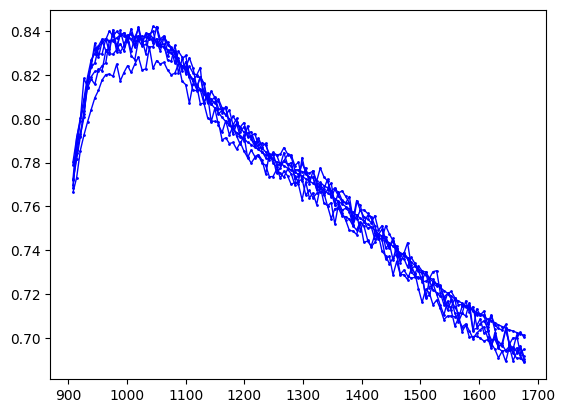

In [ ]:
c = 0
for i in df_train.loc[df_train['cluster'] == c].index:
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)
plt.show()

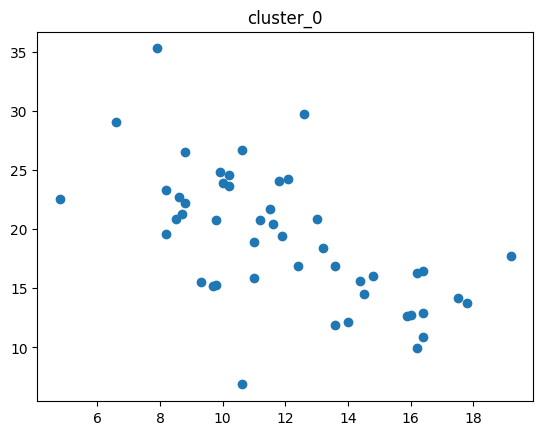

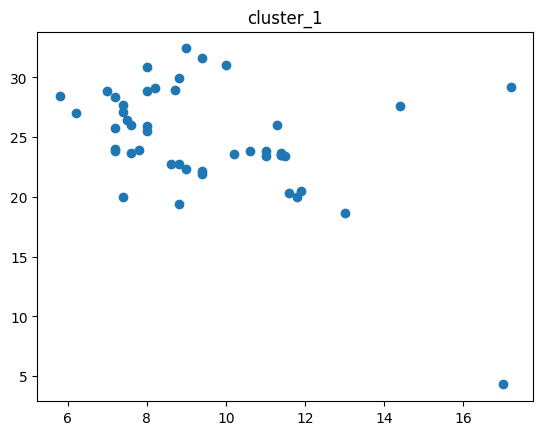

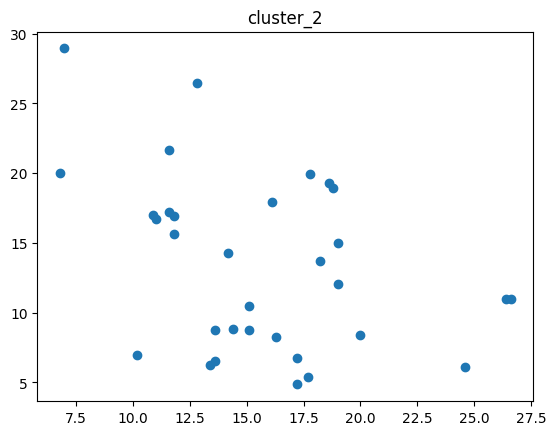

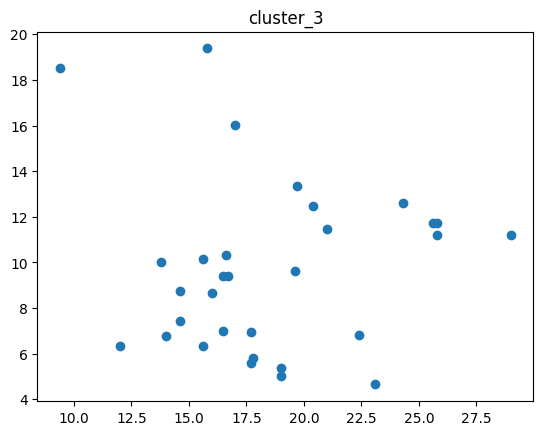

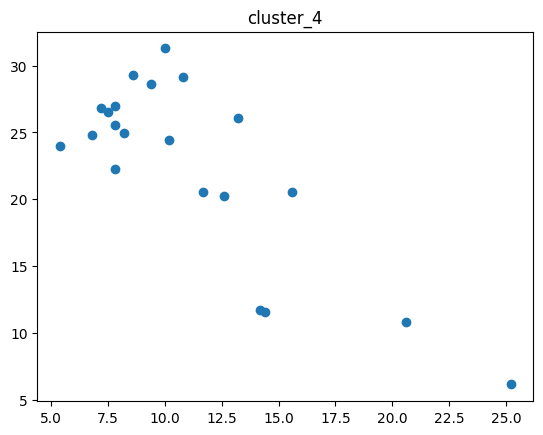

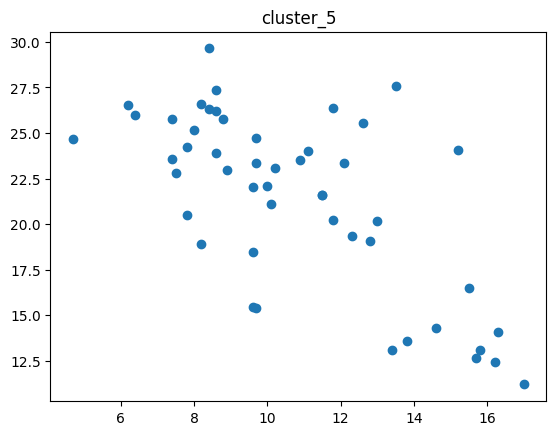

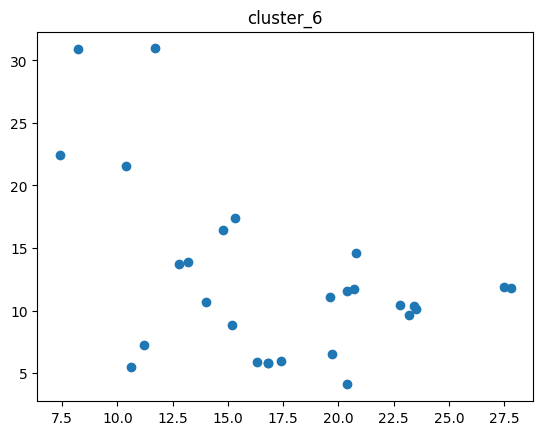

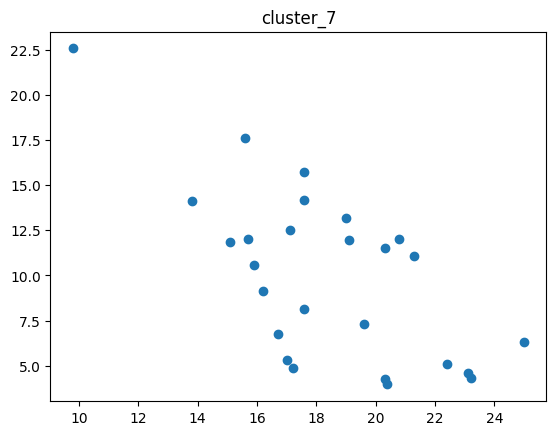

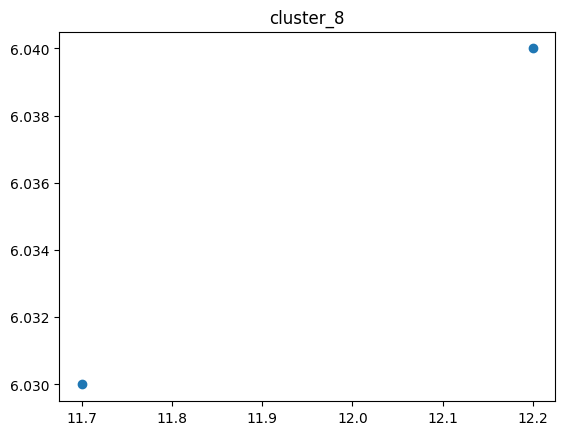

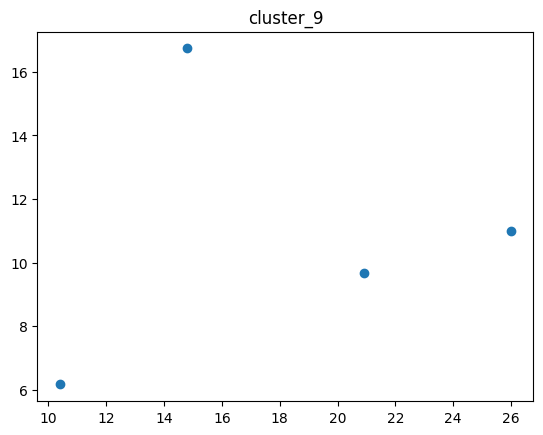

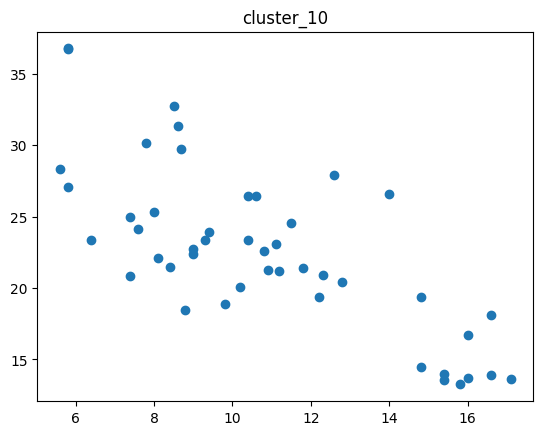

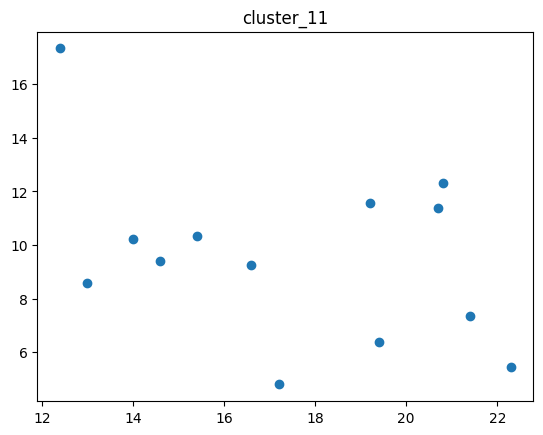

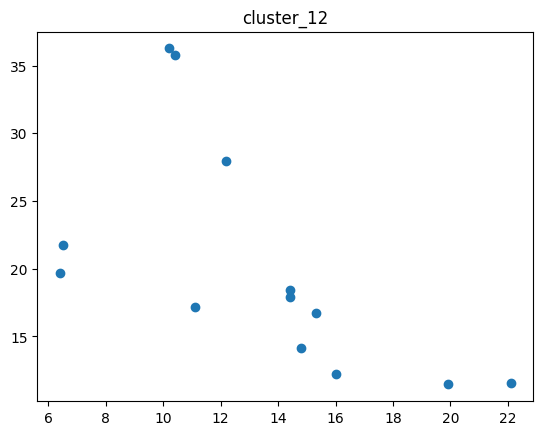

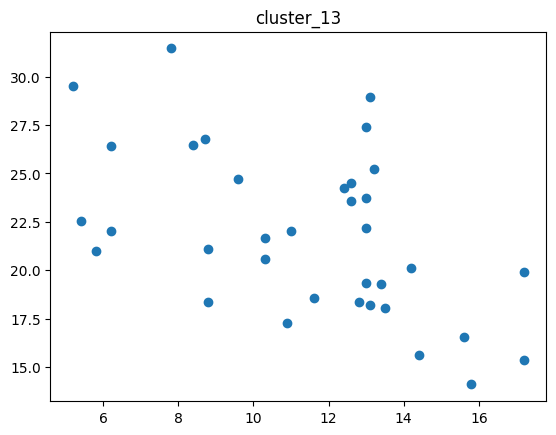

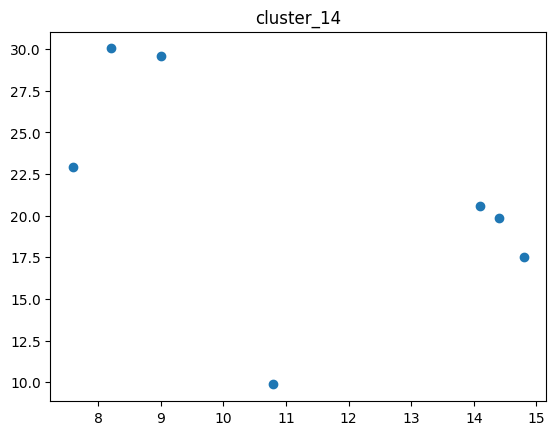

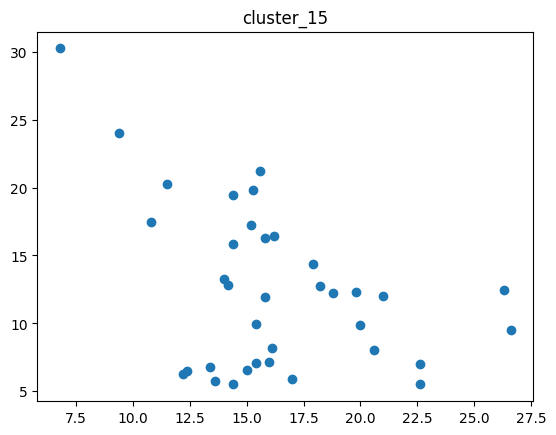

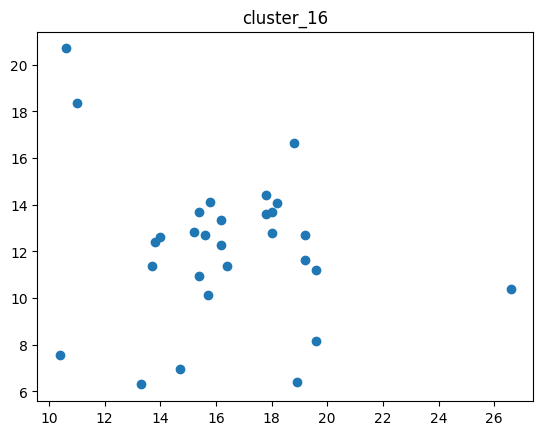

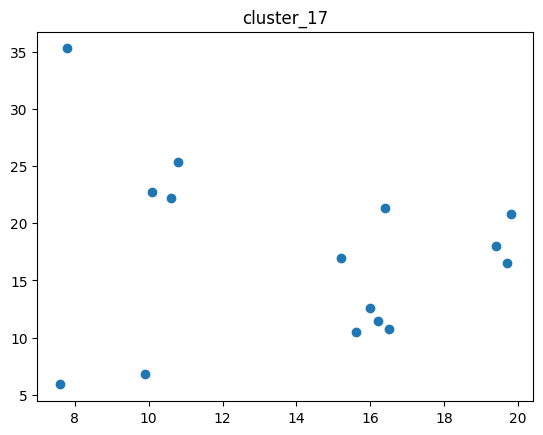

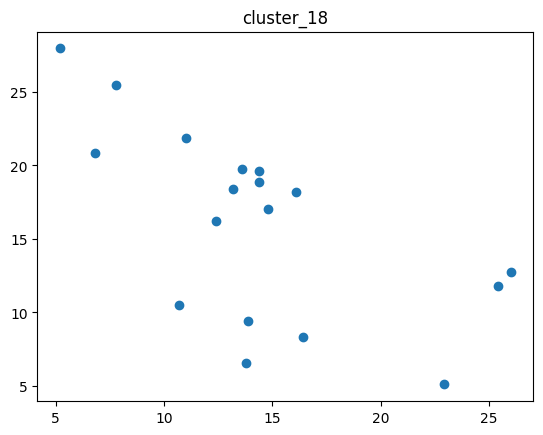

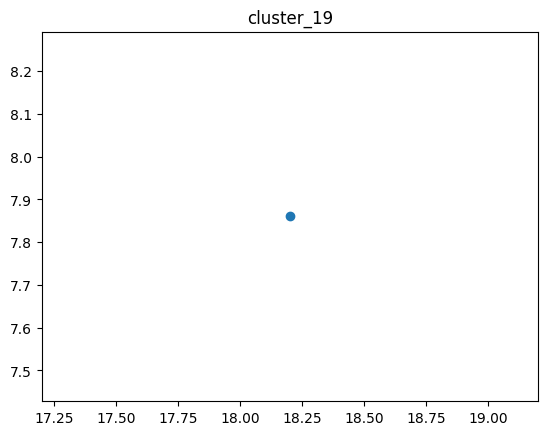

In [ ]:
# 水分 vs 灰分
for c in range(20):
    df_c = df_train.loc[df_train['cluster'] == c]
    plt.title(f'cluster_{c}')
    plt.scatter(df_c['水分'],df_c['灰分'])
    plt.show()

In [ ]:
# 一阶差分特征
df_train['gap_abs_mean'] = df_train.iloc[:,3:128].diff(axis = 1).abs().mean(axis = 1)

(array([  3.,  79., 313.,   3.,   2.,   0.,  10.,  47.,  38.,   5.]),
 array([0.00059116, 0.0009776 , 0.00136404, 0.00175049, 0.00213693,
        0.00252338, 0.00290982, 0.00329626, 0.00368271, 0.00406915,
        0.0044556 ]),
 <BarContainer object of 10 artists>)

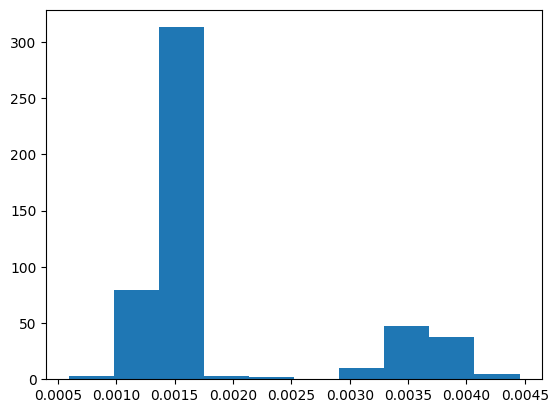

In [ ]:
plt.hist(df_train['gap_abs_mean'])

In [ ]:
# 根据一阶差分结果可以把数据集分成两类
df_train['gap_cluster'] = 0
df_train.loc[df_train['gap_abs_mean'] > 0.0026, 'gap_cluster'] = 1

### 从下面散点图可以看出, 波动较大的样本相对来说存在向右偏移的特性, 即具有波动特征的样品水分相对会更高

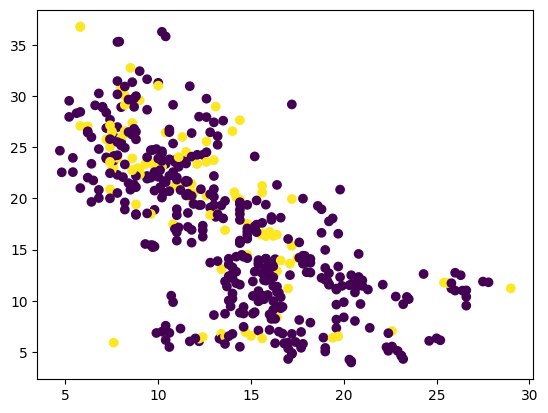

In [ ]:
plt.scatter(df_train['水分'],df_train['灰分'], c = df_train['gap_cluster'])

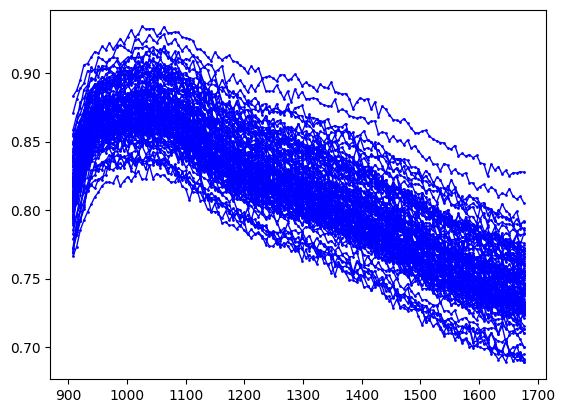

In [ ]:
c = 1
for i in df_train.loc[df_train['gap_cluster'] == c].index:
    plt.plot( df_tp['spectrum'],df_tp[i], color='blue', linewidth=1, marker='o', markersize=1)
plt.show()

# 构建模型

In [ ]:
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

var_col = ['max_spectrum', 'max_absorb', 'left_spectrum', 'right_spectrum', 'gap_cluster']
y_train = df_train['水分']
x_train = df_train[var_col]
x_train,x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
# 定义数据处理步骤和模型
# 创建 ColumnTransformer 对象
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['max_spectrum', 'max_absorb', 'left_spectrum', 'right_spectrum'])  # 对指定特征列进行标准化处理
    ],
    remainder='passthrough'  # 保留未指定的特征列)
)
preprocessing_steps = [('preprocessor', preprocessor)]
model = LinearRegression()

# 建立pipeline
pipeline = Pipeline(steps=preprocessing_steps + [('model', model)])

# 在pipeline上进行拟合和预测
pipeline.fit(x_train, y_train)


# 拟合R2
fitted_r2 = r2_score(y_train, pipeline.predict(x_train))
# 计算 R方
y_pred = pipeline.predict(x_test)
# 打印拟合模型以及预测R2
r2 = r2_score(y_test, y_pred)
print(f'fitted r2: {fitted_r2}\n data test r2 is {r2}')

fitted r2: 0.37042875948549103
 data test r2 is 0.35831009581246176


In [ ]:
# 假设你已经拟合了一个名为 model 的线性回归模型，并且 X 是特征矩阵

# 获取特征的系数
coefficients = model.coef_

# 将特征的系数与特征名称对应起来
feature_importance = pd.Series(coefficients, index=x_train.columns)

# 打印特征的重要性
print(feature_importance)


max_spectrum      4.439598e+13
max_absorb        1.582031e+00
left_spectrum     1.487784e+00
right_spectrum   -4.439598e+13
gap_cluster      -1.069992e+00
dtype: float64


In [ ]:
print(r2)

0.21079252335426668